# 분류기만

In [1]:
import os
import pickle
import datetime

folder_path = 'dataset_224_224/'
x_train, y_train, x_val, y_val, x_test, y_test = [], [], [], [], [], []

with open(folder_path+'x_train.pickle', 'rb') as f:
    x_train = pickle.load(f)

with open(folder_path+'y_train.pickle', 'rb') as f:
    y_train = pickle.load(f)

with open(folder_path+'x_val.pickle', 'rb') as f:
    x_val = pickle.load(f)

with open(folder_path+'y_val.pickle', 'rb') as f:
    y_val = pickle.load(f)

with open(folder_path+'x_test.pickle', 'rb') as f:
    x_test = pickle.load(f)

with open(folder_path+'y_test.pickle', 'rb') as f:
    y_test = pickle.load(f)
    
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape)

(17154, 224, 224, 3) (17154,) (5718, 224, 224, 3) (5718,) (5718, 224, 224, 3) (5718,)


In [2]:
train_images = x_train
train_labels = y_train
val_images = x_val
val_labels = y_val
test_images = x_test
test_labels = y_test

In [3]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models

from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D
from tensorflow.keras import Input
from tensorflow.keras.layers import Dropout, BatchNormalization

import matplotlib.pyplot as plt
import os
import tensorflow as tf

y_train = tf.keras.utils.to_categorical(train_labels, 3)
y_val = tf.keras.utils.to_categorical(val_labels, 3)
y_test = tf.keras.utils.to_categorical(test_labels, 3)
y_train.shape, y_val.shape, y_test.shape

((17154, 3), (5718, 3), (5718, 3))

In [4]:
base_model = tf.keras.applications.NASNetMobile(include_top=False, input_shape = (224, 224 ,3), weights = 'imagenet')
base_model.output_shape
base_model.trainable = False

# model.Sequential()없이 모델 구축하는 방법
inputs = tf.keras.Input(shape=(224, 224, 3))

x = base_model(inputs, training=False)
x = tf.keras.layers.Flatten(input_shape=base_model.output_shape[1:])(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x= tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(3, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)

early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

checkpoint_path = "checkpoints/NASNetMobile/cp-0-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

model_name = '_NASNetMobile_1'
current_time = datetime.datetime.now().strftime("%Y%m%d") # Y : 연도 / m : 월 / d : 일 / H : 시 / M : 분 / S : 초

log_dir = "logs/" + current_time + model_name
board_effib7_1 = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1) # epoch마다 히스토그램 계산


# categorical_crossentropy
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate= 0.001),
                  loss = 'categorical_crossentropy',
                  metrics=['accuracy'])

# 모델 fitting
hist_classifi = model.fit(train_images, y_train, epochs = 30, validation_data=(val_images, y_val)
, batch_size=125, callbacks=[early, board_effib7_1])

2022-12-01 08:47:33.805485: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-01 08:47:33.805804: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1
19993432/19993432 [==============================] - 3s 0us/step
Epoch 1/30


2022-12-01 08:47:45.132320: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-12-01 08:47:51.804158: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


138/138 [==============================] - ETA: 0s - loss: 1.6491 - accuracy: 0.5200

2022-12-01 08:50:34.887775: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


138/138 [==============================] - 225s 2s/step - loss: 1.6491 - accuracy: 0.5200 - val_loss: 0.8039 - val_accuracy: 0.6062
Epoch 2/30
138/138 [==============================] - 197s 1s/step - loss: 0.8381 - accuracy: 0.5796 - val_loss: 0.7699 - val_accuracy: 0.5946
Epoch 3/30
138/138 [==============================] - 195s 1s/step - loss: 0.7943 - accuracy: 0.6045 - val_loss: 0.7372 - val_accuracy: 0.6518
Epoch 4/30
138/138 [==============================] - 192s 1s/step - loss: 0.7547 - accuracy: 0.6164 - val_loss: 0.7137 - val_accuracy: 0.6462
Epoch 5/30
138/138 [==============================] - 190s 1s/step - loss: 0.7227 - accuracy: 0.6400 - val_loss: 0.7028 - val_accuracy: 0.6723
Epoch 6/30
138/138 [==============================] - 191s 1s/step - loss: 0.6862 - accuracy: 0.6542 - val_loss: 0.6886 - val_accuracy: 0.6747
Epoch 7/30
138/138 [==============================] - 190s 1s/step - loss: 0.6614 - accuracy: 0.6686 - val_loss: 0.6867 - val_accuracy: 0.6828
Epoch 8/30

[1.6490848064422607, 0.8380950689315796, 0.7942671775817871, 0.7546895146369934, 0.7226607799530029, 0.6861967444419861, 0.661415159702301, 0.6471307873725891, 0.6260189414024353, 0.6147461533546448, 0.5994052290916443, 0.585368275642395, 0.5677500367164612, 0.5585894584655762]
[0.5199953317642212, 0.5796315670013428, 0.6044654250144958, 0.6164159774780273, 0.6400256752967834, 0.6541914343833923, 0.6685904264450073, 0.6741867661476135, 0.683630645275116, 0.6917920112609863, 0.7031013369560242, 0.7087559700012207, 0.7162761092185974, 0.7187244892120361]
[0.8038671612739563, 0.7699459195137024, 0.7371582388877869, 0.7137404084205627, 0.7027965784072876, 0.6886428594589233, 0.6866934895515442, 0.6794857978820801, 0.6919587850570679, 0.6974490880966187, 0.6743773818016052, 0.6882140636444092, 0.6989706754684448, 0.7098826766014099]
[0.6061559915542603, 0.5946134924888611, 0.651801347732544, 0.6462050080299377, 0.6722630262374878, 0.6747114658355713, 0.682756245136261, 0.6731374859809875, 0

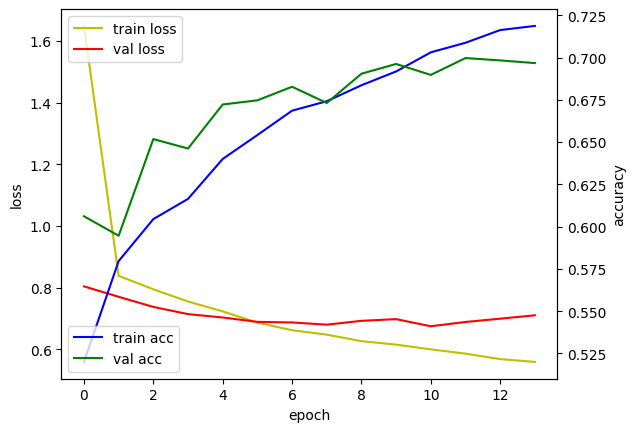

179/179 - 50s - loss: 0.7274 - accuracy: 0.6969 - 50s/epoch - 281ms/step
loss:  0.7273838520050049 , acc:  0.6969220042228699


In [5]:
print(hist_classifi.history['loss'])
print(hist_classifi.history['accuracy'])
print(hist_classifi.history['val_loss'])
print(hist_classifi.history['val_accuracy'])

import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist_classifi.history['loss'], 'y', label='train loss')
loss_ax.plot(hist_classifi.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(hist_classifi.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist_classifi.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='lower left')

plt.show()

#모델 검증
test_loss, test_acc = model.evaluate(test_images, y_test, verbose=2)
print('loss: ', test_loss, ', acc: ', test_acc)  

model.save('models/NASNetMobile_1.h5')

# 하위층만

In [9]:
base_model = tf.keras.applications.NASNetMobile(include_top=False, input_shape = (224, 224 ,3), weights = 'imagenet')

base_model.trainable = False
base_model.trainable = True

for layer in base_model.layers[:-20]: 
  layer.trainable = False				

for layer in base_model.layers[-100:]:	
  print(layer.name, layer.trainable)

inputs = tf.keras.Input(shape=(224, 224, 3))

x = base_model(inputs, training=False) # batchnorm 부분 update 방지

x = tf.keras.layers.Flatten(input_shape=base_model.output_shape[1:])(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x= tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(3, activation='softmax')(x)

model_efficientb7 = tf.keras.Model(inputs, outputs)

model_efficientb7.compile(optimizer = tf.keras.optimizers.Adam( learning_rate= 0.0001),
                  loss = 'categorical_crossentropy',
                  metrics=['accuracy'])

early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)

checkpoint_path = "checkpoints/EfficientNetB7/cp-2-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, # 고유한 파일이름 부여 가능 
    monitor='val_loss', # val_loss값을 기준으로 최저점일때를 기록하고 싶다면
    save_best_only=True, # True를 주면 monitor기준 최고상태 기록
    save_weights_only=False, # False면 모델 레이어 및 weight값 모두
    save_freq='epoch' # 체크포인트 저장하는 에폭주기 설정 가능
)

def scheduler(epoch, lr):
   if epoch < 10:
     return lr
   else:
     return lr * 0.1

lr_schedule = tf.keras.callbacks.LearningRateScheduler(scheduler, verbose=0)

model_name = '_EfficientNetB7_2'
current_time = datetime.datetime.now().strftime("%Y%m%d") # Y : 연도 / m : 월 / d : 일 / H : 시 / M : 분 / S : 초

log_dir = "logs/" + current_time + model_name
board_effib7 = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1) # epoch마다 히스토그램 계산

normal_left4_10 False
normal_right4_10 False
separable_conv_2_bn_normal_left5_10 False
normal_add_1_10 False
normal_add_2_10 False
normal_add_3_10 False
normal_add_4_10 False
normal_add_5_10 False
normal_concat_10 False
activation_351 False
activation_352 False
adjust_conv_projection_11 False
normal_conv_1_11 False
adjust_bn_11 False
normal_bn_1_11 False
activation_353 False
activation_355 False
activation_357 False
activation_359 False
activation_361 False
separable_conv_1_normal_left1_11 False
separable_conv_1_normal_right1_11 False
separable_conv_1_normal_left2_11 False
separable_conv_1_normal_right2_11 False
separable_conv_1_normal_left5_11 False
separable_conv_1_bn_normal_left1_11 False
separable_conv_1_bn_normal_right1_11 False
separable_conv_1_bn_normal_left2_11 False
separable_conv_1_bn_normal_right2_11 False
separable_conv_1_bn_normal_left5_11 False
activation_354 False
activation_356 False
activation_358 False
activation_360 False
activation_362 False
separable_conv_2_normal_

In [10]:
hist_classifi_2 = model_efficientb7.fit(train_images, y_train, epochs = 30, validation_data=(val_images, y_val), batch_size=125
                            , callbacks=[cp_callback, early, board_effib7, lr_schedule])

Epoch 1/30


2022-12-01 09:41:40.545205: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


138/138 [==============================] - ETA: 0s - loss: 1.4879 - accuracy: 0.5592

2022-12-01 09:44:22.051994: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


INFO:tensorflow:Assets written to: checkpoints/EfficientNetB7/cp-2-0001.ckpt/assets


INFO:tensorflow:Assets written to: checkpoints/EfficientNetB7/cp-2-0001.ckpt/assets


138/138 [==============================] - 299s 2s/step - loss: 1.4879 - accuracy: 0.5592 - val_loss: 0.7810 - val_accuracy: 0.6385 - lr: 1.0000e-04
Epoch 2/30
138/138 [==============================] - ETA: 0s - loss: 0.7498 - accuracy: 0.6577

INFO:tensorflow:Assets written to: checkpoints/EfficientNetB7/cp-2-0002.ckpt/assets


INFO:tensorflow:Assets written to: checkpoints/EfficientNetB7/cp-2-0002.ckpt/assets


138/138 [==============================] - 275s 2s/step - loss: 0.7498 - accuracy: 0.6577 - val_loss: 0.7291 - val_accuracy: 0.6663 - lr: 1.0000e-04
Epoch 3/30
138/138 [==============================] - ETA: 0s - loss: 0.6501 - accuracy: 0.7083

INFO:tensorflow:Assets written to: checkpoints/EfficientNetB7/cp-2-0003.ckpt/assets


INFO:tensorflow:Assets written to: checkpoints/EfficientNetB7/cp-2-0003.ckpt/assets


138/138 [==============================] - 278s 2s/step - loss: 0.6501 - accuracy: 0.7083 - val_loss: 0.6865 - val_accuracy: 0.6852 - lr: 1.0000e-04
Epoch 4/30
138/138 [==============================] - ETA: 0s - loss: 0.5671 - accuracy: 0.7507

INFO:tensorflow:Assets written to: checkpoints/EfficientNetB7/cp-2-0004.ckpt/assets


INFO:tensorflow:Assets written to: checkpoints/EfficientNetB7/cp-2-0004.ckpt/assets


138/138 [==============================] - 280s 2s/step - loss: 0.5671 - accuracy: 0.7507 - val_loss: 0.6688 - val_accuracy: 0.7036 - lr: 1.0000e-04
Epoch 5/30
138/138 [==============================] - ETA: 0s - loss: 0.5108 - accuracy: 0.7845

INFO:tensorflow:Assets written to: checkpoints/EfficientNetB7/cp-2-0005.ckpt/assets


INFO:tensorflow:Assets written to: checkpoints/EfficientNetB7/cp-2-0005.ckpt/assets


138/138 [==============================] - 275s 2s/step - loss: 0.5108 - accuracy: 0.7845 - val_loss: 0.6570 - val_accuracy: 0.7155 - lr: 1.0000e-04
Epoch 6/30
138/138 [==============================] - ETA: 0s - loss: 0.4558 - accuracy: 0.8081

INFO:tensorflow:Assets written to: checkpoints/EfficientNetB7/cp-2-0006.ckpt/assets


INFO:tensorflow:Assets written to: checkpoints/EfficientNetB7/cp-2-0006.ckpt/assets


138/138 [==============================] - 537s 4s/step - loss: 0.4558 - accuracy: 0.8081 - val_loss: 0.6468 - val_accuracy: 0.7233 - lr: 1.0000e-04
Epoch 7/30
138/138 [==============================] - ETA: 0s - loss: 0.4066 - accuracy: 0.8311

INFO:tensorflow:Assets written to: checkpoints/EfficientNetB7/cp-2-0007.ckpt/assets


INFO:tensorflow:Assets written to: checkpoints/EfficientNetB7/cp-2-0007.ckpt/assets


138/138 [==============================] - 586s 4s/step - loss: 0.4066 - accuracy: 0.8311 - val_loss: 0.6453 - val_accuracy: 0.7272 - lr: 1.0000e-04
Epoch 8/30
138/138 [==============================] - 465s 3s/step - loss: 0.3600 - accuracy: 0.8545 - val_loss: 0.6496 - val_accuracy: 0.7289 - lr: 1.0000e-04
Epoch 9/30
138/138 [==============================] - 478s 3s/step - loss: 0.3243 - accuracy: 0.8684 - val_loss: 0.6546 - val_accuracy: 0.7356 - lr: 1.0000e-04


[1.4878841638565063, 0.7497758269309998, 0.6501461863517761, 0.5670680403709412, 0.510836660861969, 0.4557720124721527, 0.4065972864627838, 0.36003172397613525, 0.3242606222629547]
[0.5591698884963989, 0.6577474474906921, 0.7083479166030884, 0.7507287263870239, 0.784540057182312, 0.8081496953964233, 0.8310598134994507, 0.854494571685791, 0.868368923664093]
[0.7809619307518005, 0.729080080986023, 0.6864543557167053, 0.6687605977058411, 0.6570231914520264, 0.6467556953430176, 0.6452513337135315, 0.6495884656906128, 0.6545524597167969]
[0.63850998878479, 0.6663169264793396, 0.6852046251296997, 0.7035676836967468, 0.715459942817688, 0.7233298420906067, 0.7271773815155029, 0.7289262413978577, 0.7355719208717346]


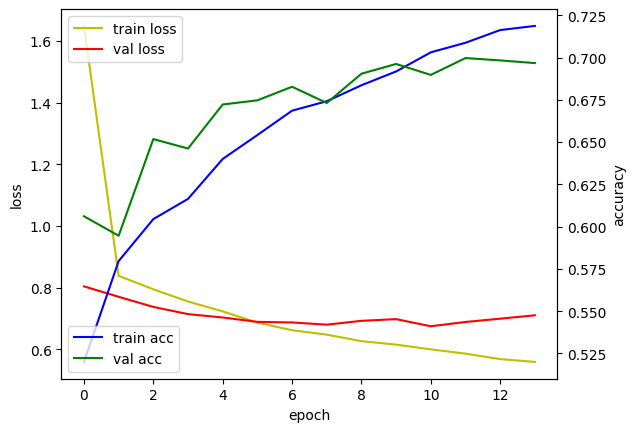

179/179 - 120s - loss: 0.7274 - accuracy: 0.6969 - 120s/epoch - 668ms/step
loss:  0.7273838520050049 , acc:  0.6969220042228699


In [11]:
print(hist_classifi_2.history['loss'])
print(hist_classifi_2.history['accuracy'])
print(hist_classifi_2.history['val_loss'])
print(hist_classifi_2.history['val_accuracy'])

import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist_classifi.history['loss'], 'y', label='train loss')
loss_ax.plot(hist_classifi.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(hist_classifi.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist_classifi.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='lower left')

plt.show()

#모델 검증
test_loss, test_acc = model.evaluate(test_images, y_test, verbose=2)
print('loss: ', test_loss, ', acc: ', test_acc)  
model_efficientb7.save('models/NASNetMobile_2.h5')

# 전부재학습

In [ ]:
base_model = tf.keras.applications.NASNetMobile(include_top=False, input_shape = (224, 224 ,3), weights = 'imagenet')

base_model.trainable = True

inputs = tf.keras.Input(shape=(224, 224, 3))

x = base_model(inputs, training=False) # batchnorm 부분 update 방지

x = tf.keras.layers.Flatten(input_shape=base_model.output_shape[1:])(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x= tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(3, activation='softmax')(x)

model_effib7_3 = tf.keras.Model(inputs, outputs)

model_effib7_3.compile(optimizer = tf.keras.optimizers.Adam( learning_rate= 0.0001),
                  loss = 'categorical_crossentropy',
                  metrics=['accuracy'])

early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)

checkpoint_path = "checkpoints/EfficientNetB7/cp-3-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, # 고유한 파일이름 부여 가능 
    monitor='val_loss', # val_loss값을 기준으로 최저점일때를 기록하고 싶다면
    save_best_only=True, # True를 주면 monitor기준 최고상태 기록
    save_weights_only=False, # False면 모델 레이어 및 weight값 모두
    save_freq='epoch' # 체크포인트 저장하는 에폭주기 설정 가능
)

def scheduler(epoch, lr):
   if epoch < 10:
     return lr
   else:
     return lr * 0.1

lr_schedule = tf.keras.callbacks.LearningRateScheduler(scheduler, verbose=0)

model_name = '_EfficientNetB7_3'
current_time = datetime.datetime.now().strftime("%Y%m%d") # Y : 연도 / m : 월 / d : 일 / H : 시 / M : 분 / S : 초

log_dir = "logs/" + current_time + model_name
board_effib7 = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1) # epoch마다 히스토그램 계산

In [ ]:
hist_classifi_7 = model_effib7_3.fit(train_images, y_train, epochs = 30, validation_data=(val_images, y_val), batch_size=125
                            , callbacks=[cp_callback, early, board_effib7, lr_schedule])

In [ ]:
print(hist_classifi_7.history['loss'])
print(hist_classifi_7.history['accuracy'])
print(hist_classifi_7.history['val_loss'])
print(hist_classifi_7.history['val_accuracy'])

import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist_classifi_7.history['loss'], 'y', label='train loss')
loss_ax.plot(hist_classifi_7.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(hist_classifi_7.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist_classifi_7.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='lower left')

plt.show()

#모델 검증
test_loss, test_acc = model_effib7_3.evaluate(test_images, y_test, verbose=2)
print('loss: ', test_loss, ', acc: ', test_acc)  
model_effib7_3.save('models/NASNetMobile_3.h5')

# fine-tune

In [ ]:
## fine-tune
model.trainable = True

model.compile(optimizer = tf.keras.optimizers.Adam( learning_rate= 0.0001),
                loss = 'categorical_crossentropy',
                metrics=['accuracy'])

early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

checkpoint_path = "/Users/jeonminjeong/Downloads/알파코/프로젝트/이미지인식/checkpoints/EfficientNetB7/cp-4-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, # 고유한 파일이름 부여 가능 
    monitor='val_loss', # val_loss값을 기준으로 최저점일때를 기록하고 싶다면
    save_best_only=True, # True를 주면 monitor기준 최고상태 기록
    save_weights_only=False, # False면 모델 레이어 및 weight값 모두
    save_freq='epoch' # 체크포인트 저장하는 에폭주기 설정 가능
)

def scheduler(epoch, lr):
   if epoch < 10:
     return lr
   else:
     return lr * 0.1

lr_schedule = tf.keras.callbacks.LearningRateScheduler(scheduler, verbose=0)

model_name = '_EfficientNetB7_4'
current_time = datetime.datetime.now().strftime("%Y%m%d") # Y : 연도 / m : 월 / d : 일 / H : 시 / M : 분 / S : 초

log_dir = "logs/" + current_time + model_name
board_inception4 = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1) # epoch마다 히스토그램 계산

In [ ]:
hist_classifi_8 = model.fit(train_images, y_train, epochs = 30, validation_data=(val_images, y_val), batch_size=125
                            , callbacks=[cp_callback, early, board_inception4, lr_schedule])

In [ ]:
print(hist_classifi_8.history['loss'])
print(hist_classifi_8.history['accuracy'])
print(hist_classifi_8.history['val_loss'])
print(hist_classifi_8.history['val_accuracy'])

import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist_classifi_8.history['loss'], 'y', label='train loss')
loss_ax.plot(hist_classifi_8.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(hist_classifi_8.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist_classifi_8.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='lower left')

plt.show()

In [ ]:
#모델 검증
test_loss, test_acc = model.evaluate(test_images, y_test, verbose=2)
print('loss: ', test_loss, ', acc: ', test_acc)  
model.save('models/NASNetMobile_4.h5')